<a href="https://colab.research.google.com/github/IsaacMaciasZX/TareasTHC/blob/main/Trabajo12_11Compu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from mpl_toolkits.basemap import Basemap
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg

ModuleNotFoundError: No module named 'skforecast'

In [2]:
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_chida.csv'
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1)

In [3]:
<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 29/08/2014 to 23/03/2016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Country                  2484 non-null   object
 1   No. of confirmed cases   2484 non-null   int64
 2   No. of confirmed deaths  1648 non-null   float64
 3   Male Cases               2484 non-null   float64
 4   Female Cases             2484 non-null   float64
 5   Boys                     2484 non-null   float64
 6   Girls                    2484 non-null   float64
 7   Adult Male               2484 non-null   float64
 8   Adult Female             2484 non-null   float64
 9   Old Male                 2484 non-null   float64
 10  Old Female               2484 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 232.9+ KB

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-3-ce22dd1745e7>, line 2)

In [4]:
df['Country'].isin(['Mexico']).sum() #buscar info del ebola en mejico

0

In [7]:
df.isnull().sum() #cuantos valores faltantes hay en la base de datos por columna

,0
Country,0
No. of confirmed cases,0
No. of confirmed deaths,836
Male Cases,0
Female Cases,0
Boys,0
Girls,0
Adult Male,0
Adult Female,0
Old Male,0


In [8]:
conteo=df.groupby('Country').size().reset_index(name='conteo')
conteo.sort_values('conteo',ascending=False)

,Country,conteo
2,Liberia,364
0,Guinea,259
6,Sierra Leone,259
4,Nigeria,255
5,Senegal,254
9,United States of America,245
3,Mali,243
7,Spain,243
8,United Kingdom,221
1,Italy,141


In [5]:
missings=df['No. of confirmed deaths'].isnull().groupby(df['Country']).sum()
missings.sort_values(ascending=False)

,No. of confirmed deaths
Country,
Liberia,239
Mali,234
United Kingdom,219
Italy,140
Guinea,2
Sierra Leone,2
Nigeria,0
Senegal,0
Spain,0


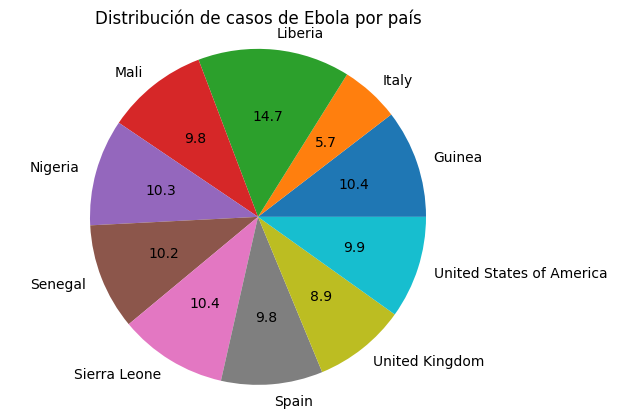

In [10]:
plt.pie(conteo['conteo'],labels=conteo['Country'],autopct="%0.1f")
plt.title('Distribución de casos de Ebola por país')
plt.axis('equal')
plt.savefig('ebola_pie.png', dpi=300,format='png')
plt.show()

In [11]:
#analizar los casos de ebola en guinea
Guinea=df[df['Country']=='Guinea']
Guinea.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
08/09/2014,Guinea,664,400.0,398.4,265.6,119.52,79.68,239.04,159.36,39.84,26.56
12/09/2014,Guinea,678,403.0,406.8,271.2,122.04,81.36,244.08,162.72,40.68,27.12
16/09/2014,Guinea,743,429.0,445.8,297.2,133.74,89.16,267.48,178.32,44.58,29.72


In [12]:
Guinea.shape

(259, 11)

In [14]:
Guinea.describe()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
count,259.000000,257.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,2894.293436,1794.595331,1736.576062,1157.717375,520.972819,347.315212,1041.945637,694.630425,173.657606,115.771737
std,680.007101,435.855453,408.004261,272.002840,122.401278,81.600852,244.802556,163.201704,40.800426,27.200284
min,482.000000,287.000000,289.200000,192.800000,86.760000,57.840000,173.520000,115.680000,28.920000,19.280000
25%,2674.000000,1651.000000,1604.400000,1069.600000,481.320000,320.880000,962.640000,641.760000,160.440000,106.960000
50%,3216.000000,2009.000000,1929.600000,1286.400000,578.880000,385.920000,1157.760000,771.840000,192.960000,128.640000
75%,3336.000000,2076.000000,2001.600000,1334.400000,600.480000,400.320000,1200.960000,800.640000,200.160000,133.440000
max,3351.000000,2083.000000,2010.600000,1340.400000,603.180000,402.120000,1206.360000,804.240000,201.060000,134.040000


In [17]:
mean_value=Guinea['No. of confirmed cases'].mean()
Guinea.fillna(mean_value,inplace=True)
Guinea.isnull().sum()

<ipython-input-17-e53533fbd396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Guinea.fillna(mean_value,inplace=True)


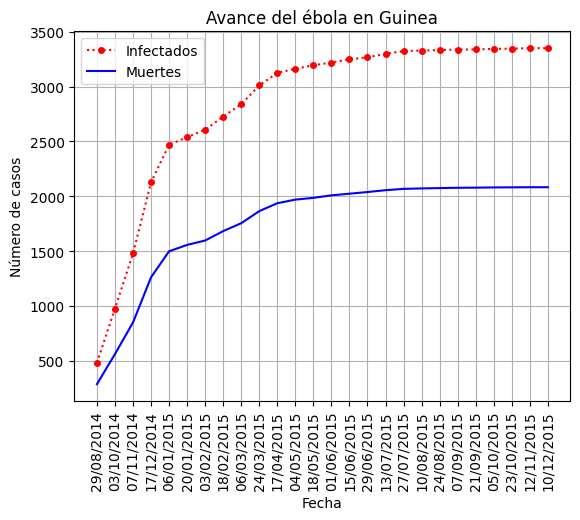

In [30]:
Guinea_infectados=Guinea['No. of confirmed cases'][0:-1:10]
Guinea_muertes=Guinea['No. of confirmed deaths'][0:-1:10]
fechas=Guinea.index[0:-1:10]
plt.plot(fechas,Guinea_infectados,'o:r', ms=4, label='Infectados')
plt.plot(fechas,Guinea_muertes,'-b',ms=4,label='Muertes')
plt.title('Avance del ébola en Guinea')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.savefig('ebola_guinea.png', dpi=300,format='png')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

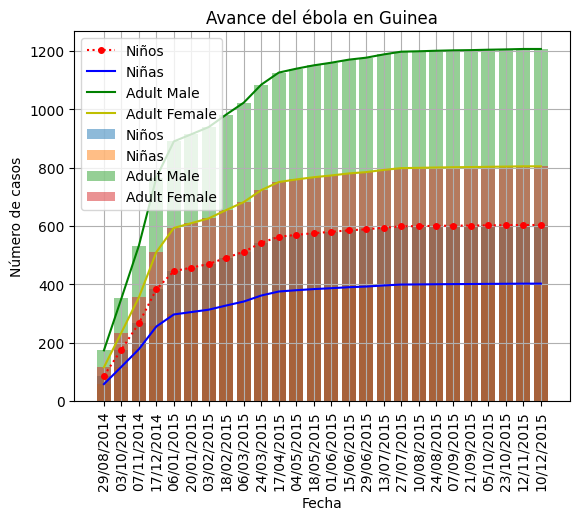

In [42]:
Guinea_boys=Guinea['Boys'][0:-1:10]
Guinea_girls=Guinea['Girls'][0:-1:10]
Guinea_AM=Guinea['Adult Male'][0:-1:10]
Guinea_AF=Guinea['Adult Female'][0:-1:10]
fechas=Guinea.index[0:-1:10]
plt.plot(fechas,Guinea_boys,'o:r', ms=4, label='Niños')
plt.bar(fechas,Guinea_boys,alpha=0.5,label='Niños')
plt.plot(fechas,Guinea_girls,'-b',ms=4,label='Niñas')
plt.bar(fechas,Guinea_girls,alpha=0.5,label='Niñas')
plt.plot(fechas,Guinea_AM,'-g',ms=4,label='Adult Male')
plt.bar(fechas,Guinea_AM,alpha=0.5,label='Adult Male')
plt.plot(fechas,Guinea_AF,'-y',ms=4,label='Adult Female')
plt.bar(fechas,Guinea_AF,alpha=0.5,label='Adult Female')
plt.title('Avance del ébola en Guinea')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt


In [ ]:

from sklearn.linear_model import LinearRegression
